# Weather Prediction 
## Predicta - Part 2

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
# importing the datasets
df = pd.read_csv('daily_data.csv')
submission_df = pd.read_csv('submission.csv')
df.head()

day_id city_id  temperature_celsius           condition_text  wind_kph  \
0  D0001    C001                 27.0                      NaN       6.1   
1  D0002    C001                 22.0                      NaN       6.1   
2  D0003    C001                 20.0  Light Rain with Thunder       3.6   
3  D0004    C001                 17.0          Clear and Sunny       6.1   
4  D0005    C001                 18.0                      NaN       3.6   

   wind_degree  pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  \
0          210       1006.0        0.0        54     75                28.0   
1          170       1006.0        0.0        73     75                24.5   
2           10       1011.0        4.5       100     75                20.0   
3          150       1018.0        0.0        88      0                17.0   
4           92       1019.0        0.0        94      0                18.0   

   visibility_km  uv_index  gust_kph  air_quality_us-epa-index   sunrise  \
0           10.0       6.0      11.9                         2  06:04 AM   
1           10.0       1.0      23.4                         1  06:05 AM   
2           10.0       1.0      12.6                         1  06:05 AM   
3           10.0       1.0      11.2                         1  06:06 AM   
4           10.0       1.0       9.0                         1  06:07 AM   

     sunset  
0  07:19 PM  
1  07:18 PM  
2  07:18 PM  
3  07:16 PM  
4  07:15 PM

## Preprossecing

In [48]:
df['city_id'].value_counts()

city_id
C001    26
C071    26
C081    26
C080    26
C079    26
        ..
C031    26
C094    25
C104    25
C070    25
C105    10
Name: count, Length: 112, dtype: int64

In [49]:
# dropping the time columns
df = df.drop(columns=['sunrise', 'sunset'])
df.head()

day_id city_id  temperature_celsius           condition_text  wind_kph  \
0  D0001    C001                 27.0                      NaN       6.1   
1  D0002    C001                 22.0                      NaN       6.1   
2  D0003    C001                 20.0  Light Rain with Thunder       3.6   
3  D0004    C001                 17.0          Clear and Sunny       6.1   
4  D0005    C001                 18.0                      NaN       3.6   

   wind_degree  pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  \
0          210       1006.0        0.0        54     75                28.0   
1          170       1006.0        0.0        73     75                24.5   
2           10       1011.0        4.5       100     75                20.0   
3          150       1018.0        0.0        88      0                17.0   
4           92       1019.0        0.0        94      0                18.0   

   visibility_km  uv_index  gust_kph  air_quality_us-epa-index  
0           10.0       6.0      11.9                         2  
1           10.0       1.0      23.4                         1  
2           10.0       1.0      12.6                         1  
3           10.0       1.0      11.2                         1  
4           10.0       1.0       9.0                         1

In [50]:
# Mapping the city ids
city_id_map = {}
city_ids = df['city_id'].unique()
for n in range(len(city_ids)):
    city_id_map[city_ids[n]] = n
    
print(city_id_map)

{'C001': 0, 'C002': 1, 'C003': 2, 'C004': 3, 'C005': 4, 'C006': 5, 'C007': 6, 'C008': 7, 'C009': 8, 'C010': 9, 'C011': 10, 'C012': 11, 'C013': 12, 'C014': 13, 'C015': 14, 'C016': 15, 'C019': 16, 'C017': 17, 'C018': 18, 'C020': 19, 'C021': 20, 'C022': 21, 'C023': 22, 'C024': 23, 'C025': 24, 'C026': 25, 'C027': 26, 'C028': 27, 'C029': 28, 'C030': 29, 'C031': 30, 'C032': 31, 'C033': 32, 'C034': 33, 'C035': 34, 'C036': 35, 'C037': 36, 'C038': 37, 'C039': 38, 'C040': 39, 'C041': 40, 'C042': 41, 'C043': 42, 'C044': 43, 'C045': 44, 'C046': 45, 'C047': 46, 'C048': 47, 'C049': 48, 'C050': 49, 'C051': 50, 'C052': 51, 'C053': 52, 'C054': 53, 'C055': 54, 'C057': 55, 'C058': 56, 'C059': 57, 'C060': 58, 'C061': 59, 'C062': 60, 'C063': 61, 'C064': 62, 'C065': 63, 'C066': 64, 'C067': 65, 'C068': 66, 'C069': 67, 'C070': 68, 'C071': 69, 'C072': 70, 'C056': 71, 'C073': 72, 'C074': 73, 'C075': 74, 'C076': 75, 'C077': 76, 'C078': 77, 'C079': 78, 'C080': 79, 'C081': 80, 'C082': 81, 'C083': 82, 'C084': 83, '

In [51]:
response_map = {
    'Light Rain with Thunder':0,
    'Clear and Sunny':1,
    'Partly Cloudy':2,
    'Light Precipitation':3,
    'Cloudy and Overcast':4,
    'Mist or Fog':5,
    'Rain Showers':6,
    'Moderate to Heavy Rain':7,
    'Thunderstorms':8
}

df_mapped = df.copy()

In [52]:
df_mapped['city_id'] = df['city_id'].map(city_id_map)
df_mapped['condition_text'] = df_mapped['condition_text'].map(response_map)

df_mapped.head()

day_id  city_id  temperature_celsius  condition_text  wind_kph  wind_degree  \
0  D0001        0                 27.0             NaN       6.1          210   
1  D0002        0                 22.0             NaN       6.1          170   
2  D0003        0                 20.0             0.0       3.6           10   
3  D0004        0                 17.0             1.0       6.1          150   
4  D0005        0                 18.0             NaN       3.6           92   

   pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  visibility_km  \
0       1006.0        0.0        54     75                28.0           10.0   
1       1006.0        0.0        73     75                24.5           10.0   
2       1011.0        4.5       100     75                20.0           10.0   
3       1018.0        0.0        88      0                17.0           10.0   
4       1019.0        0.0        94      0                18.0           10.0   

   uv_index  gust_kph  air_quality_us-epa-index  
0       6.0      11.9                         2  
1       1.0      23.4                         1  
2       1.0      12.6                         1  
3       1.0      11.2                         1  
4       1.0       9.0                         1

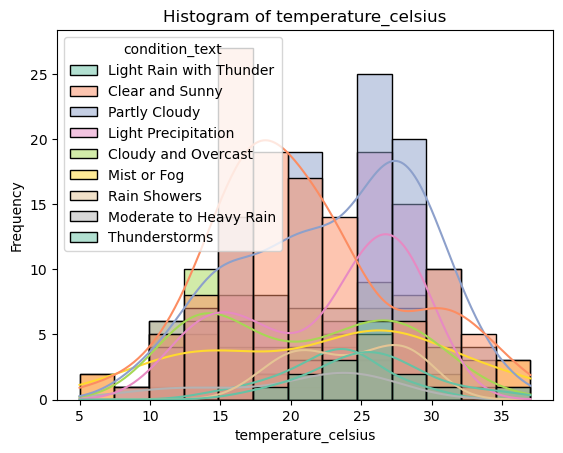

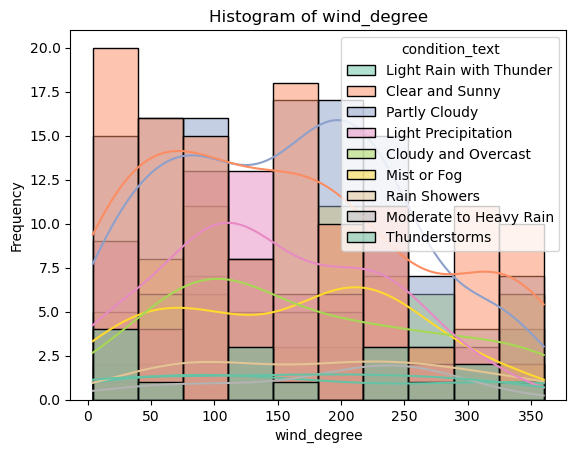

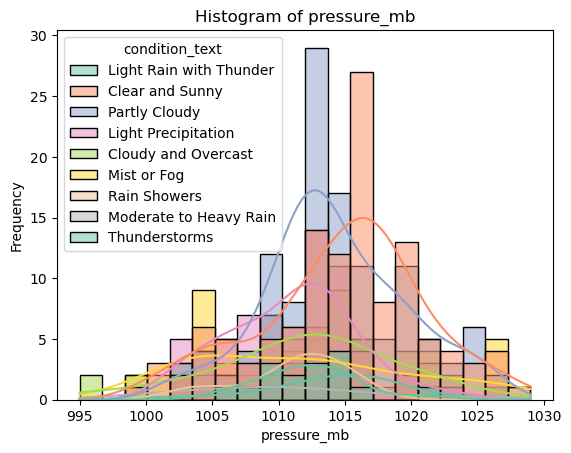

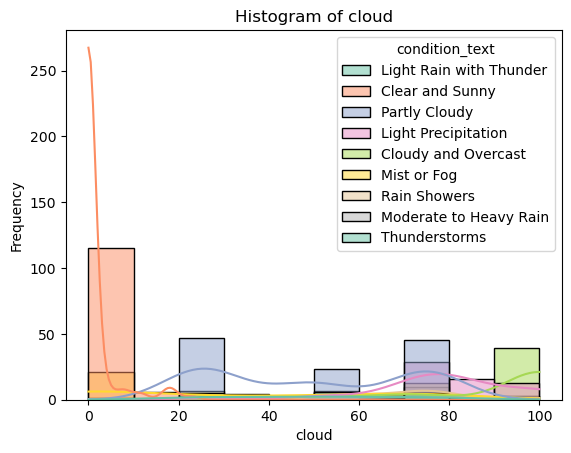

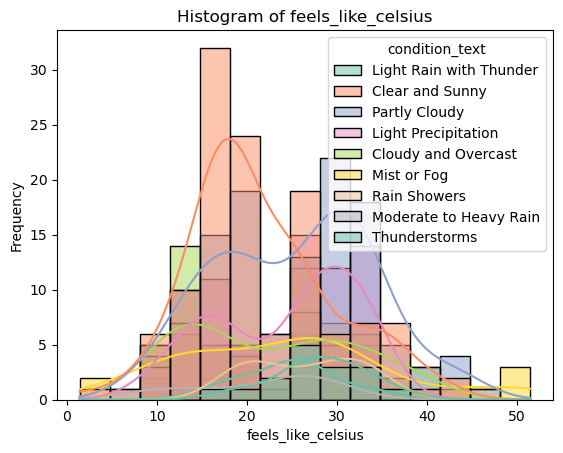

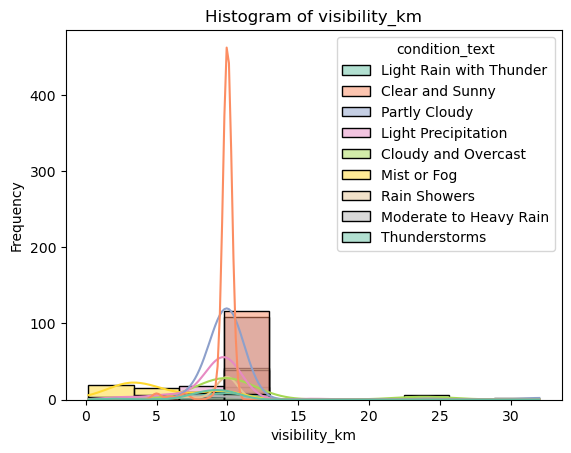

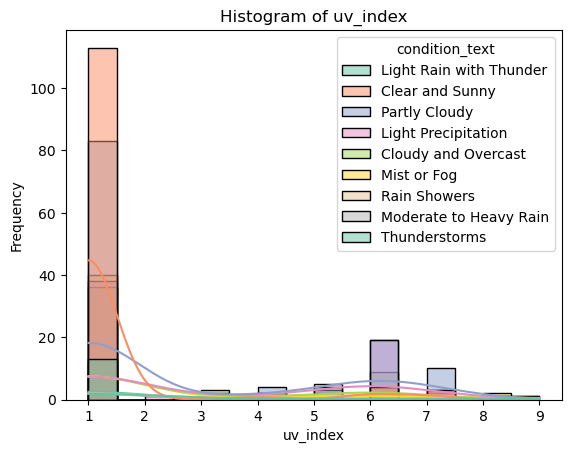

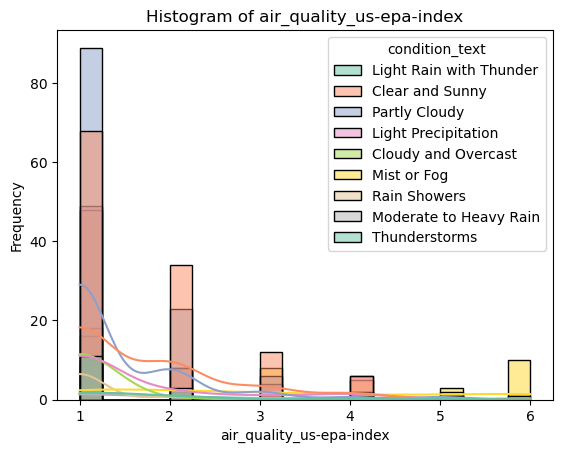

In [53]:
for column in df.dropna().columns.drop(['day_id', 'city_id', 'condition_text']):
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
                sns.histplot(data=df, x=column, kde=True, hue='condition_text', palette='Set2')
                plt.title(f'Histogram of {column}')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.show()
                
        elif df[column].dtype == 'object':
                sns.countplot(data=df, x=column, kde=True, hue='condition_text', palette='Set2')
                plt.title(f'Histogram of {column}')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.show()

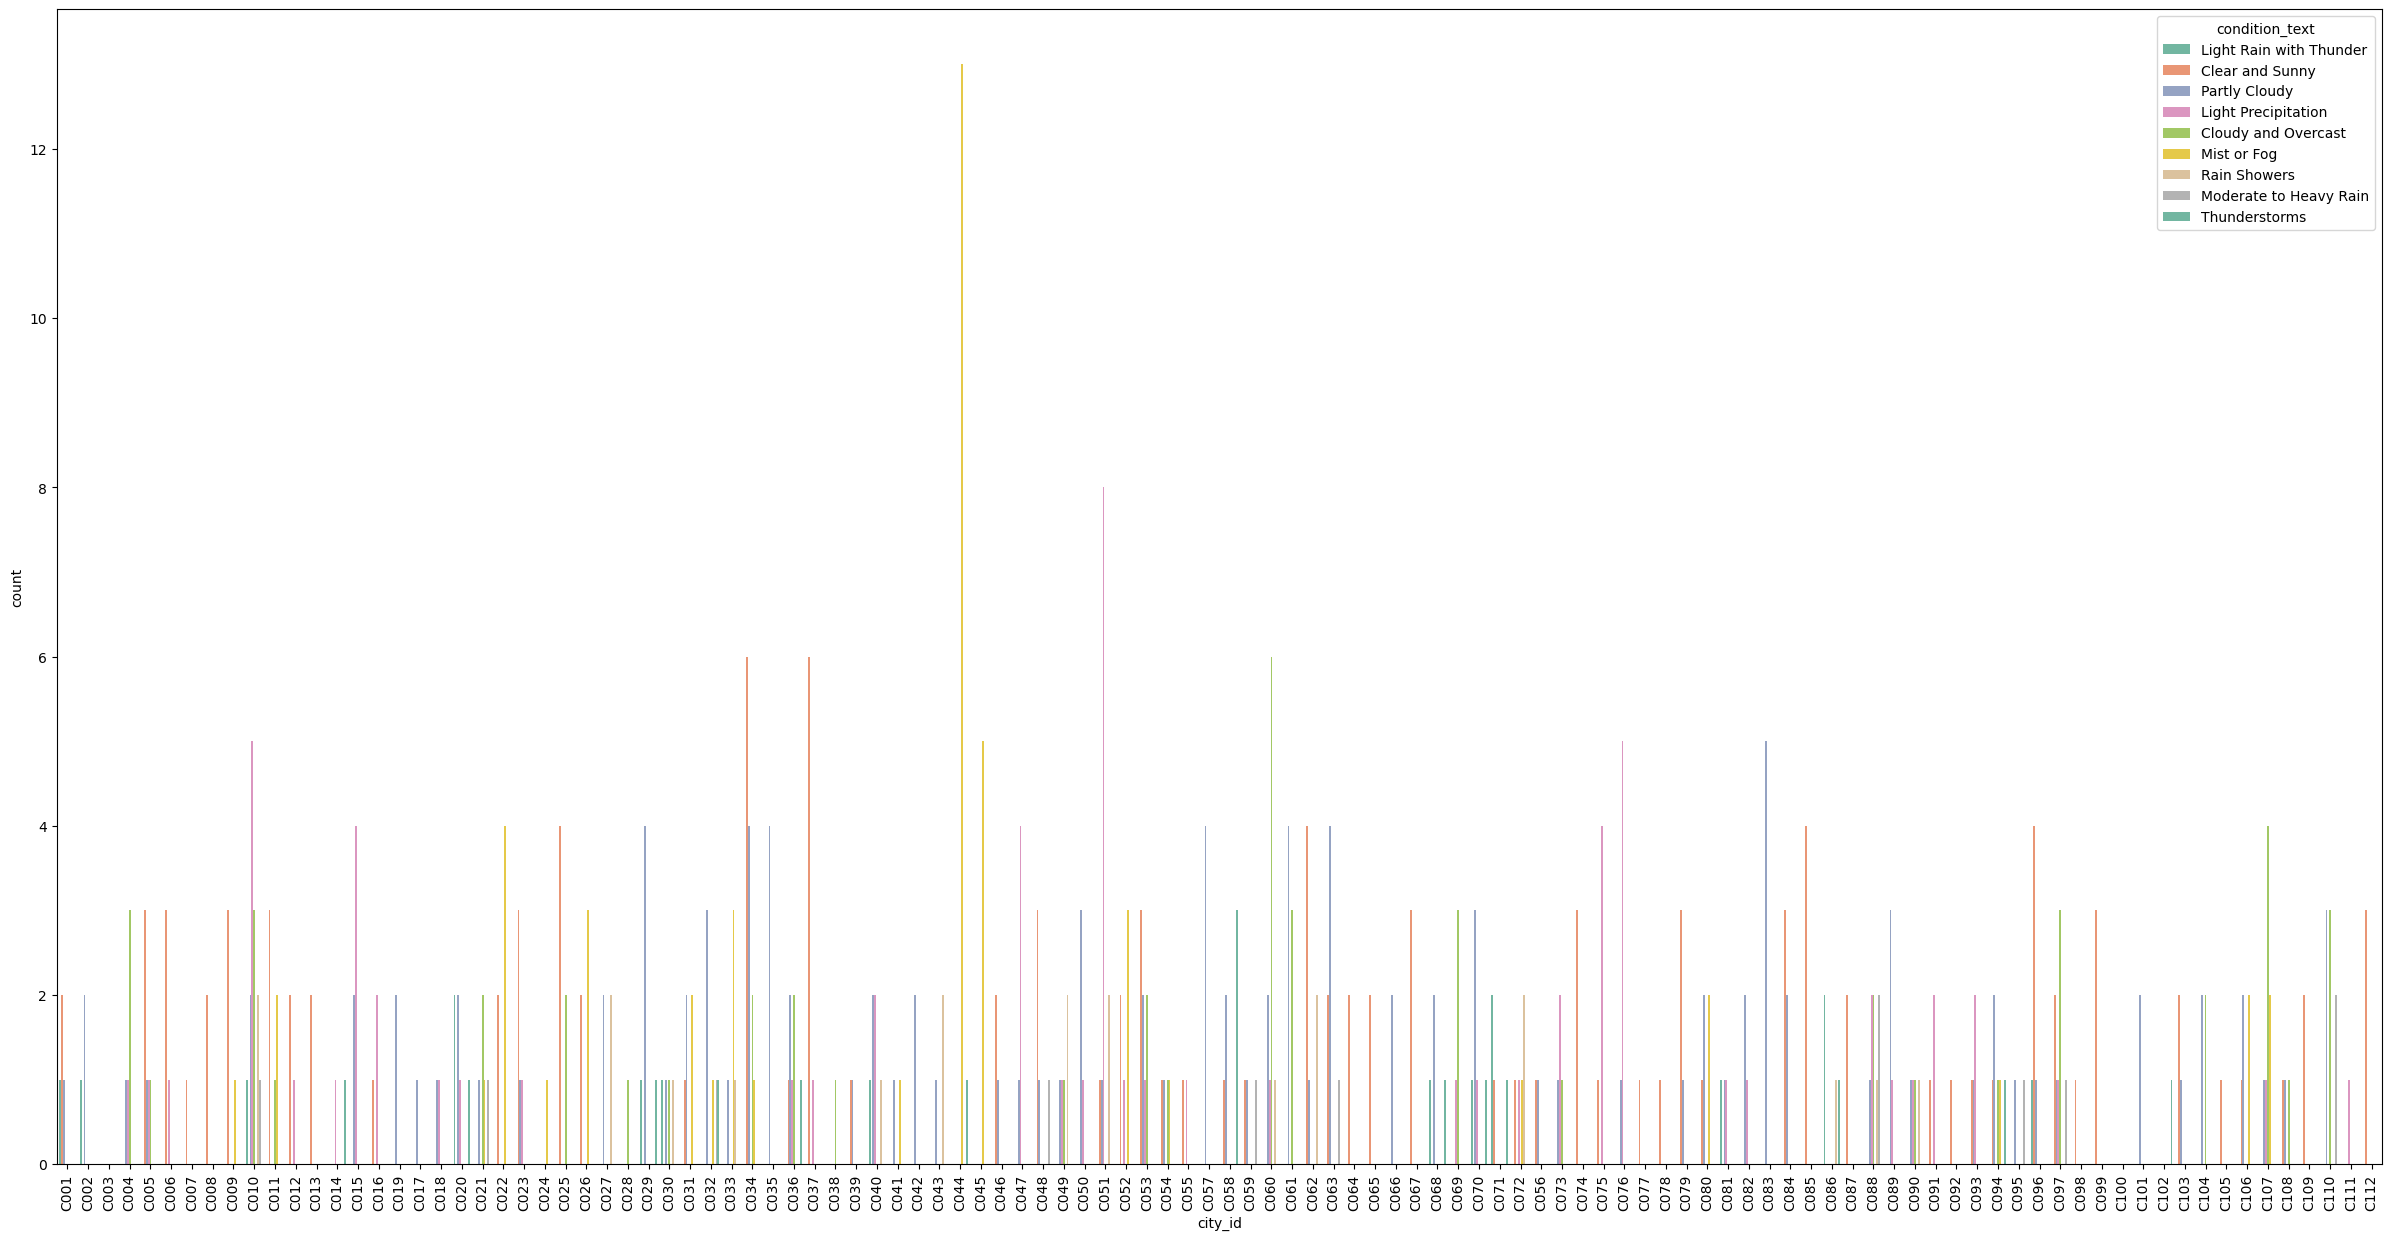

In [54]:
plt.figure(figsize=[30, 15])
sns.countplot(data=df, x='city_id', hue='condition_text', palette='Set2')
plt.xticks(rotation=90)
plt.show()

Creating the train dataset with the not NaN condition text 

In [55]:
train_df = df_mapped.dropna()

In [56]:
train_df.isna().sum()

day_id                      0
city_id                     0
temperature_celsius         0
condition_text              0
wind_kph                    0
wind_degree                 0
pressure_mb                 0
precip_mm                   0
humidity                    0
cloud                       0
feels_like_celsius          0
visibility_km               0
uv_index                    0
gust_kph                    0
air_quality_us-epa-index    0
dtype: int64

In [57]:
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

df_features = train_df.drop(columns=['day_id', 'condition_text'])
df_features_scaled = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)
df_features_scaled.head() 
print(df_features_scaled.std())

city_id                     1.001045
temperature_celsius         1.001045
wind_kph                    1.001045
wind_degree                 1.001045
pressure_mb                 1.001045
precip_mm                   1.001045
humidity                    1.001045
cloud                       1.001045
feels_like_celsius          1.001045
visibility_km               1.001045
uv_index                    1.001045
gust_kph                    1.001045
air_quality_us-epa-index    1.001045
dtype: float64


In [58]:
df_features_scaled.shape

(479, 13)

In [59]:
df_features_scaled.head()

city_id  temperature_celsius  wind_kph  wind_degree  pressure_mb  \
0 -1.749880            -0.325687 -0.976376    -1.491115    -0.345813   
1 -1.749880            -0.791186 -0.634911    -0.084787     0.802218   
2 -1.749880            -0.170521 -0.921742     1.522446     0.310205   
3 -1.749880            -0.480854 -0.976376    -0.948674     0.638214   
4 -1.717131            -0.480854 -0.976376    -0.757815    -0.509818   

   precip_mm  humidity     cloud  feels_like_celsius  visibility_km  uv_index  \
0   3.808121  1.160612  0.802314           -0.442245       0.187573 -0.560011   
1  -0.246614  0.506188 -1.269057           -0.791270       0.187573 -0.560011   
2  -0.246614  1.160612  0.111857           -0.325903       0.187573 -0.560011   
3  -0.246614  0.506188 -1.269057           -0.558586       0.187573 -0.560011   
4  -0.246614 -0.311842 -0.578600           -0.558586       0.187573 -0.560011   

   gust_kph  air_quality_us-epa-index  
0 -0.466108                 -0.562029  
1 -0.594301                 -0.562029  
2 -0.237193                  0.281896  
3 -0.859843                  1.125820  
4 -0.859843                 -0.562029

In [60]:
y = train_df['condition_text']
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, y, test_size=0.2, random_state=42)
X_train.shape

(383, 13)

## Modeling and Training

In [66]:
def report(predictions):
    print(accuracy_score(y_pred=predictions, y_true=y_test))
    print(confusion_matrix(y_pred=predictions, y_true=y_test))
    print(classification_report(y_pred=predictions, y_true=y_test))

In [68]:
# Logistic Regression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_pred = lr_model.fit(X=X_train, y=y_train).predict(X_test)
report(lr_pred)

0.59375
[[ 0  0  3  1  0  1  0  0  0]
 [ 0 22  0  0  0  0  0  0  0]
 [ 0  3 17  3  2  1  0  0  0]
 [ 0  0  4  6  1  1  0  0  0]
 [ 0  0  4  3  5  0  0  0  0]
 [ 0  0  1  0  0  6  0  0  1]
 [ 0  0  1  3  0  0  0  0  1]
 [ 0  0  0  3  0  0  0  1  0]
 [ 0  0  1  1  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.88      1.00      0.94        22
         2.0       0.55      0.65      0.60        26
         3.0       0.30      0.50      0.38        12
         4.0       0.62      0.42      0.50        12
         5.0       0.67      0.75      0.71         8
         6.0       0.00      0.00      0.00         5
         7.0       1.00      0.25      0.40         4
         8.0       0.00      0.00      0.00         2

    accuracy                           0.59        96
   macro avg       0.45      0.40      0.39        96
weighted avg       0.56      0.59      0.56        96



In [69]:
# Linear Discriminant Analysis
lda_model = LDA()
lda_pred = lda_model.fit(X=X_train, y=y_train).predict(X_test)
report(lda_pred)

0.5104166666666666
[[ 0  0  3  0  0  1  0  1  0]
 [ 0 22  0  0  0  0  0  0  0]
 [ 0  7 11  3  3  1  0  1  0]
 [ 0  0  4  7  1  0  0  0  0]
 [ 0  0  4  4  4  0  0  0  0]
 [ 0  2  0  0  0  5  0  0  1]
 [ 0  0  1  3  0  0  0  0  1]
 [ 0  1  0  3  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.69      1.00      0.81        22
         2.0       0.44      0.42      0.43        26
         3.0       0.35      0.58      0.44        12
         4.0       0.50      0.33      0.40        12
         5.0       0.71      0.62      0.67         8
         6.0       0.00      0.00      0.00         5
         7.0       0.00      0.00      0.00         4
         8.0       0.00      0.00      0.00         2

    accuracy                           0.51        96
   macro avg       0.30      0.33      0.31        96
weighted avg       0.44      0.51      0.46        96



In [70]:
# Quadretic discriminant Analysis
qda_model = QDA()
qda_pred = qda_model.fit(X=X_train, y=y_train).predict(X_test)
report(qda_pred)

0.5625
[[ 0  0  3  1  0  1  0  0  0]
 [ 0 22  0  0  0  0  0  0  0]
 [ 0  1 17  1  5  2  0  0  0]
 [ 0  0  4  4  3  1  0  0  0]
 [ 0  0  5  2  5  0  0  0  0]
 [ 0  0  2  0  1  5  0  0  0]
 [ 0  0  2  2  0  0  1  0  0]
 [ 0  0  2  1  1  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.96      1.00      0.98        22
         2.0       0.47      0.65      0.55        26
         3.0       0.33      0.33      0.33        12
         4.0       0.33      0.42      0.37        12
         5.0       0.56      0.62      0.59         8
         6.0       1.00      0.20      0.33         5
         7.0       0.00      0.00      0.00         4
         8.0       0.00      0.00      0.00         2

    accuracy                           0.56        96
   macro avg       0.41      0.36      0.35        96
weighted avg       0.53      0.56      0.53        96



In [71]:
# KKNs
for n in range(1, 150, 1):
    knn_model = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
    knn_pred = knn_model.fit(X=X_train, y=y_train).predict(X_test)
    print(f"N:{n}  accuracy: {accuracy_score(y_pred=knn_pred, y_true=y_test)}")

N:1  accuracy: 0.46875
N:2  accuracy: 0.4791666666666667
N:3  accuracy: 0.46875
N:4  accuracy: 0.5104166666666666
N:5  accuracy: 0.5
N:6  accuracy: 0.5208333333333334
N:7  accuracy: 0.53125
N:8  accuracy: 0.5
N:9  accuracy: 0.5
N:10  accuracy: 0.5208333333333334
N:11  accuracy: 0.4895833333333333
N:12  accuracy: 0.4791666666666667
N:13  accuracy: 0.4583333333333333
N:14  accuracy: 0.46875
N:15  accuracy: 0.46875
N:16  accuracy: 0.4583333333333333
N:17  accuracy: 0.4479166666666667
N:18  accuracy: 0.4583333333333333
N:19  accuracy: 0.4583333333333333
N:20  accuracy: 0.46875
N:21  accuracy: 0.46875
N:22  accuracy: 0.46875
N:23  accuracy: 0.4583333333333333
N:24  accuracy: 0.4583333333333333
N:25  accuracy: 0.46875
N:26  accuracy: 0.46875
N:27  accuracy: 0.4583333333333333
N:28  accuracy: 0.46875
N:29  accuracy: 0.46875
N:30  accuracy: 0.46875
N:31  accuracy: 0.4583333333333333
N:32  accuracy: 0.46875
N:33  accuracy: 0.4791666666666667
N:34  accuracy: 0.46875
N:35  accuracy: 0.46875
N:36 

In [72]:
# Random_forests
for n in range(1, 150, 1):
    rr_model = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    rr_pred = rr_model.fit(X=X_train, y=y_train).predict(X_test)
    print(f"N:{n}  accuracy: {accuracy_score(y_pred=rr_pred, y_true=y_test)}")
    
# n == 118, 41 

N:1  accuracy: 0.5416666666666666
N:2  accuracy: 0.5416666666666666
N:3  accuracy: 0.5520833333333334
N:4  accuracy: 0.6770833333333334
N:5  accuracy: 0.6354166666666666
N:6  accuracy: 0.6145833333333334
N:7  accuracy: 0.6458333333333334
N:8  accuracy: 0.6770833333333334
N:9  accuracy: 0.65625
N:10  accuracy: 0.7083333333333334
N:11  accuracy: 0.6770833333333334
N:12  accuracy: 0.6770833333333334
N:13  accuracy: 0.6354166666666666
N:14  accuracy: 0.6666666666666666
N:15  accuracy: 0.71875
N:16  accuracy: 0.6979166666666666
N:17  accuracy: 0.6875
N:18  accuracy: 0.65625
N:19  accuracy: 0.6770833333333334
N:20  accuracy: 0.6875
N:21  accuracy: 0.6770833333333334
N:22  accuracy: 0.7291666666666666
N:23  accuracy: 0.6979166666666666
N:24  accuracy: 0.71875
N:25  accuracy: 0.6770833333333334
N:26  accuracy: 0.71875
N:27  accuracy: 0.6770833333333334
N:28  accuracy: 0.7604166666666666
N:29  accuracy: 0.7291666666666666
N:30  accuracy: 0.71875
N:31  accuracy: 0.7083333333333334
N:32  accuracy

In [98]:
rr_model = RandomForestClassifier(n_estimators=138, n_jobs=-1)
rr_pred = rr_model.fit(X=X_train, y=y_train).predict(X_test)
report(rr_pred)

0.7291666666666666
[[ 0  0  3  1  0  1  0  0  0]
 [ 0 22  0  0  0  0  0  0  0]
 [ 0  0 24  1  1  0  0  0  0]
 [ 0  0  3  8  1  0  0  0  0]
 [ 0  0  3  1  8  0  0  0  0]
 [ 0  0  0  1  0  7  0  0  0]
 [ 0  0  1  3  0  0  1  0  0]
 [ 0  0  1  1  2  0  0  0  0]
 [ 0  0  1  0  0  0  1  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       1.00      1.00      1.00        22
         2.0       0.67      0.92      0.77        26
         3.0       0.50      0.67      0.57        12
         4.0       0.67      0.67      0.67        12
         5.0       0.88      0.88      0.88         8
         6.0       0.50      0.20      0.29         5
         7.0       0.00      0.00      0.00         4
         8.0       0.00      0.00      0.00         2

    accuracy                           0.73        96
   macro avg       0.47      0.48      0.46        96
weighted avg       0.65      0.73      0.68        96



In [74]:
# Desicion trees
dt_model = DecisionTreeClassifier()
dt_pred = dt_model.fit(X=X_train, y=y_train).predict(X_test)
report(dt_pred)

0.625
[[ 0  0  2  1  0  0  1  0  1]
 [ 0 20  0  0  0  2  0  0  0]
 [ 3  0 20  0  2  0  0  0  1]
 [ 0  0  1  4  4  0  2  0  1]
 [ 1  0  1  1  9  0  0  0  0]
 [ 1  1  0  1  0  5  0  0  0]
 [ 0  0  2  0  0  1  1  0  1]
 [ 0  0  0  1  3  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  1]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.95      0.91      0.93        22
         2.0       0.77      0.77      0.77        26
         3.0       0.44      0.33      0.38        12
         4.0       0.50      0.75      0.60        12
         5.0       0.62      0.62      0.62         8
         6.0       0.25      0.20      0.22         5
         7.0       0.00      0.00      0.00         4
         8.0       0.20      0.50      0.29         2

    accuracy                           0.62        96
   macro avg       0.42      0.45      0.42        96
weighted avg       0.61      0.62      0.61        96



In [67]:
from catboost import CatBoostClassifier
import lightgbm as lgb

cat_model = CatBoostClassifier()
cat_pred = cat_model.fit(X=X_train, y=y_train).predict(X_test)
report(cat_pred)

Learning rate set to 0.075347
0:	learn: 2.0297574	total: 4.07ms	remaining: 4.06s
1:	learn: 1.9254242	total: 6.4ms	remaining: 3.19s
2:	learn: 1.8601584	total: 8.66ms	remaining: 2.88s
3:	learn: 1.7791700	total: 10.9ms	remaining: 2.71s
4:	learn: 1.7160225	total: 13.1ms	remaining: 2.61s
5:	learn: 1.6582087	total: 15.2ms	remaining: 2.52s
6:	learn: 1.5934503	total: 18.4ms	remaining: 2.61s
7:	learn: 1.5416739	total: 20.7ms	remaining: 2.56s
8:	learn: 1.4997678	total: 22.7ms	remaining: 2.5s
9:	learn: 1.4490115	total: 27.1ms	remaining: 2.69s
10:	learn: 1.4198581	total: 30.2ms	remaining: 2.71s
11:	learn: 1.3822690	total: 34.4ms	remaining: 2.83s
12:	learn: 1.3460646	total: 37.4ms	remaining: 2.84s
13:	learn: 1.3203291	total: 42ms	remaining: 2.95s
14:	learn: 1.2872914	total: 44.5ms	remaining: 2.92s
15:	learn: 1.2551295	total: 47.5ms	remaining: 2.92s
16:	learn: 1.2331730	total: 49.4ms	remaining: 2.86s
17:	learn: 1.2123996	total: 51.1ms	remaining: 2.79s
18:	learn: 1.1915623	total: 54.2ms	remaining: 2.

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [i for i in range(50, 200, 5)],
    'max_depth': [None, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 12, 15, 17, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'bootstrap': [True, False]
}

rr_model = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(estimator=rr_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_best))

Fitting 3 folds for each of 10500 candidates, totalling 31500 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=55; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=55; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=55; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total ti

In [77]:
feature_importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                     Feature  Importance
7                      cloud    0.334203
9              visibility_km    0.097755
6                   humidity    0.083598
5                  precip_mm    0.069537
8         feels_like_celsius    0.060030
4                pressure_mb    0.059686
0                    city_id    0.056607
1        temperature_celsius    0.049600
11                  gust_kph    0.048902
3                wind_degree    0.046920
2                   wind_kph    0.045897
12  air_quality_us-epa-index    0.026207
10                  uv_index    0.021059


In [100]:
# All data split
rr_model_final = RandomForestClassifier(n_estimators=138, n_jobs=-1)
rr_pred_final = rr_model_final.fit(df_features_scaled, y).predict(df_features_scaled)
accuracy_score(y_pred=rr_pred_final, y_true=y)

1.0

In [101]:
print(classification_report(y_pred=rr_pred_final, y_true=y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00       122
         2.0       1.00      1.00      1.00       122
         3.0       1.00      1.00      1.00        68
         4.0       1.00      1.00      1.00        53
         5.0       1.00      1.00      1.00        50
         6.0       1.00      1.00      1.00        21
         7.0       1.00      1.00      1.00        12
         8.0       1.00      1.00      1.00        15

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479



In [102]:
df_mapped.head()

day_id  city_id  temperature_celsius  condition_text  wind_kph  wind_degree  \
0  D0001        0                 27.0             NaN       6.1          210   
1  D0002        0                 22.0             NaN       6.1          170   
2  D0003        0                 20.0             0.0       3.6           10   
3  D0004        0                 17.0             1.0       6.1          150   
4  D0005        0                 18.0             NaN       3.6           92   

   pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  visibility_km  \
0       1006.0        0.0        54     75                28.0           10.0   
1       1006.0        0.0        73     75                24.5           10.0   
2       1011.0        4.5       100     75                20.0           10.0   
3       1018.0        0.0        88      0                17.0           10.0   
4       1019.0        0.0        94      0                18.0           10.0   

   uv_index  gust_kph  air_quality_us-epa-index  
0       6.0      11.9                         2  
1       1.0      23.4                         1  
2       1.0      12.6                         1  
3       1.0      11.2                         1  
4       1.0       9.0                         1

In [73]:
df_features_final = df_mapped.drop(columns=['day_id', 'condition_text'])
df_features_scaled_final = scaler.fit_transform(df_features_final)
df_features_scaled_final = pd.DataFrame(df_features_scaled_final, columns=df_features_final.columns)
df_features_scaled_final.head() 
print(df_features_scaled_final.std())

city_id                     1.000173
temperature_celsius         1.000173
wind_kph                    1.000173
wind_degree                 1.000173
pressure_mb                 1.000173
precip_mm                   1.000173
humidity                    1.000173
cloud                       1.000173
feels_like_celsius          1.000173
visibility_km               1.000173
uv_index                    1.000173
gust_kph                    1.000173
air_quality_us-epa-index    1.000173
dtype: float64


In [104]:
df_features_scaled_final.head()

city_id  temperature_celsius  wind_kph  wind_degree  pressure_mb  \
0 -1.71352             0.752211 -0.578918     0.495181    -1.255220   
1 -1.71352            -0.003716 -0.578918     0.106846    -1.255220   
2 -1.71352            -0.306086 -0.923118    -1.446494    -0.444976   
3 -1.71352            -0.759642 -0.578918    -0.087322     0.689366   
4 -1.71352            -0.608457 -0.923118    -0.650408     0.851415   

   precip_mm  humidity     cloud  feels_like_celsius  visibility_km  uv_index  \
0  -0.176432 -1.074549  1.317637            0.481557        0.10222  1.690638   
1  -0.176432 -0.091742  1.317637            0.087230        0.10222 -0.543723   
2   4.626647  1.304878  1.317637           -0.419761        0.10222 -0.543723   
3  -0.176432  0.684158 -0.984491           -0.757755        0.10222 -0.543723   
4  -0.176432  0.994518 -0.984491           -0.645090        0.10222 -0.543723   

   gust_kph  air_quality_us-epa-index  
0 -0.477296                  0.377442  
1  0.613824                 -0.563885  
2 -0.410880                 -0.563885  
3 -0.543712                 -0.563885  
4 -0.752448                 -0.563885

In [105]:
submission_df.head()

day_id           condition_text
0  D0001                      NaN
1  D0002                      NaN
2  D0003  Light Rain with Thunder
3  D0004          Clear and Sunny
4  D0005                      NaN

In [106]:
out_df = submission_df.copy()

In [107]:
index = 0
while index < out_df.shape[0]:
    if pd.isna(out_df.loc[index, 'condition_text']):
        features = df_features_scaled_final.loc[index].values.reshape(1, -1)
        predicted = rr_model_final.predict(features)[0]  # Get the first element since predict returns an array
        out_df.loc[index, 'condition_text'] = int(predicted)
    index += 1
    
out_df    

day_id           condition_text
0     D0001                        3
1     D0002                        3
2     D0003  Light Rain with Thunder
3     D0004          Clear and Sunny
4     D0005                        1
...     ...                      ...
2888  D2889          Clear and Sunny
2889  D2890                        1
2890  D2891                        1
2891  D2892                        1
2892  D2893                        1

[2893 rows x 2 columns]

In [108]:
out_df.isna().sum()

day_id            0
condition_text    0
dtype: int64

In [109]:
out_df['condition_text'].unique()

array([3, 'Light Rain with Thunder', 'Clear and Sunny', 1,
       'Partly Cloudy', 4, 2, 5, 'Light Precipitation',
       'Cloudy and Overcast', 6, 'Mist or Fog', 'Rain Showers',
       'Moderate to Heavy Rain', 'Thunderstorms', 0, 7, 8], dtype=object)

In [86]:
response_map_reversed = {
    'Light Rain with Thunder': 'Light Rain with Thunder',
    'Clear and Sunny': 'Clear and Sunny',
    'Partly Cloudy': 'Partly Cloudy',
    'Light Precipitation': 'Light Precipitation',
    'Cloudy and Overcast': 'Cloudy and Overcast',
    'Mist or Fog': 'Mist or Fog',
    'Rain Showers': 'Rain Showers',
    'Moderate to Heavy Rain': 'Moderate to Heavy Rain',
    'Thunderstorms': 'Thunderstorms'
}

for key,value in response_map.items():
    response_map_reversed[value] = key
    
response_map_reversed

{'Light Rain with Thunder': 'Light Rain with Thunder',
 'Clear and Sunny': 'Clear and Sunny',
 'Partly Cloudy': 'Partly Cloudy',
 'Light Precipitation': 'Light Precipitation',
 'Cloudy and Overcast': 'Cloudy and Overcast',
 'Mist or Fog': 'Mist or Fog',
 'Rain Showers': 'Rain Showers',
 'Moderate to Heavy Rain': 'Moderate to Heavy Rain',
 'Thunderstorms': 'Thunderstorms',
 0: 'Light Rain with Thunder',
 1: 'Clear and Sunny',
 2: 'Partly Cloudy',
 3: 'Light Precipitation',
 4: 'Cloudy and Overcast',
 5: 'Mist or Fog',
 6: 'Rain Showers',
 7: 'Moderate to Heavy Rain',
 8: 'Thunderstorms'}

In [111]:
out_df['condition_text'] = out_df['condition_text'].replace(response_map_reversed)
out_df['condition_text'].value_counts()

condition_text
Clear and Sunny            1156
Partly Cloudy               778
Light Precipitation         494
Cloudy and Overcast         238
Mist or Fog                 143
Rain Showers                 28
Light Rain with Thunder      21
Moderate to Heavy Rain       18
Thunderstorms                17
Name: count, dtype: int64

In [112]:
out_df.isna().sum()

day_id            0
condition_text    0
dtype: int64

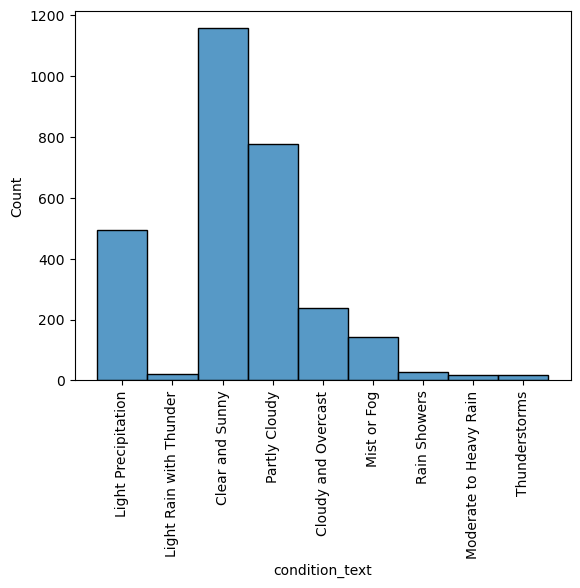

In [113]:
sns.histplot(data=out_df, x='condition_text')
plt.xticks(rotation = 90)
plt.show()

In [114]:
out_df.to_csv('085.csv', index=False)

## Deep Learning

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [133]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=10000).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [135]:
input_dim = X_train.shape[1]
num_classes = len(df['condition_text'].unique())

In [153]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(input_dim,)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training with Early Stopping and Increased Epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    train_dataset,
    epochs=1000,
    validation_data=test_dataset,
)

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1519 - loss: 2.3383 - val_accuracy: 0.1250 - val_loss: 2.2929
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.0979 - loss: 2.3217 - val_accuracy: 0.1354 - val_loss: 2.2569
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1345 - loss: 2.2985 - val_accuracy: 0.2083 - val_loss: 2.2242
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1629 - loss: 2.2749 - val_accuracy: 0.2396 - val_loss: 2.1934
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1918 - loss: 2.1562 - val_accuracy: 0.2604 - val_loss: 2.1632
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1958 - loss: 2.2102 - val_accuracy: 0.3125 - val_loss: 2.1364
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2451 - loss: 2.1561 - val_accuracy: 0.3229 - val_loss: 2.1089
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2057 - loss: 2.1216 - val_accuracy: 

In [151]:
y_pred = model.predict(test_dataset)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

print(f"Validation Accuracy: {accuracy_score(y_test, y_pred_classes)}")
print(classification_report(y_test, y_pred_classes))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Validation Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.76      1.00      0.86        22
         2.0       0.54      0.54      0.54        26
         3.0       0.38      0.42      0.40        12
         4.0       0.54      0.58      0.56        12
         5.0       0.78      0.88      0.82         8
         6.0       0.33      0.20      0.25         5
         7.0       0.00      0.00      0.00         4
         8.0       0.00      0.00      0.00         2

    accuracy                           0.58        96
   macro avg       0.37      0.40      0.38        96
weighted avg       0.52      0.58      0.55        96



In [158]:
from sklearn.linear_model import RidgeClassifier
ridge_model = RidgeClassifier(alpha=1000)
ridge_pred = ridge_model.fit(X_train, y_train).predict(X_test)
report(ridge_pred)

0.4166666666666667
[[ 0  2  2  0  0  1  0  0  0]
 [ 0 22  0  0  0  0  0  0  0]
 [ 0 12 14  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0]
 [ 0  1 11  0  0  0  0  0  0]
 [ 0  2  2  0  0  4  0  0  0]
 [ 0  0  5  0  0  0  0  0  0]
 [ 0  1  3  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.55      1.00      0.71        22
         2.0       0.27      0.54      0.36        26
         3.0       0.00      0.00      0.00        12
         4.0       0.00      0.00      0.00        12
         5.0       0.80      0.50      0.62         8
         6.0       0.00      0.00      0.00         5
         7.0       0.00      0.00      0.00         4
         8.0       0.00      0.00      0.00         2

    accuracy                           0.42        96
   macro avg       0.18      0.23      0.19        96
weighted avg       0.27      0.42      0.31        96



In [163]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(156, 80), max_iter=1000, random_state=42)
mlp_pred = mlp_model.fit(X_train, y_train).predict(X_test)
report(mlp_pred)

0.59375
[[ 0  0  3  0  0  2  0  0  0]
 [ 0 20  0  0  0  2  0  0  0]
 [ 1  4 17  1  2  0  1  0  0]
 [ 1  0  3  5  3  0  0  0  0]
 [ 0  0  2  2  7  0  0  0  1]
 [ 0  0  1  0  0  6  0  1  0]
 [ 0  0  1  0  0  1  2  1  0]
 [ 0  0  1  1  1  0  1  0  0]
 [ 0  0  1  0  0  0  1  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.83      0.91      0.87        22
         2.0       0.59      0.65      0.62        26
         3.0       0.56      0.42      0.48        12
         4.0       0.54      0.58      0.56        12
         5.0       0.55      0.75      0.63         8
         6.0       0.40      0.40      0.40         5
         7.0       0.00      0.00      0.00         4
         8.0       0.00      0.00      0.00         2

    accuracy                           0.59        96
   macro avg       0.38      0.41      0.40        96
weighted avg       0.55      0.59      0.57        96



## Test

In [27]:
y = train_df['condition_text']
y_categorical = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, y_categorical, test_size=0.2, random_state=42)
X_train.shape

(383, 13)

In [26]:
y_categorical.shape

(479, 9)

In [28]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

In [22]:
y.shape

(479,)

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [41]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8558 - loss: 0.4080 - val_accuracy: 0.6104 - val_loss: 1.3793 - learning_rate: 1.0000e-04
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8417 - loss: 0.5006 - val_accuracy: 0.6104 - val_loss: 1.3780 - learning_rate: 1.0000e-04
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8222 - loss: 0.4933 - val_accuracy: 0.6104 - val_loss: 1.3794 - learning_rate: 1.0000e-04
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8430 - loss: 0.4294 - val_accuracy: 0.6104 - val_loss: 1.3794 - learning_rate: 1.0000e-04
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8870 - loss: 0.3624 - val_accuracy: 0.6104 - val_loss: 1.3752 - learning_rate: 1.0000e-04
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8329 - loss: 0.4448 - val_accuracy: 0.6104 - val_loss: 1.3727 - learning_rate: 1.0000e-04
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.808

## Test 2

In [43]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [68]:
xg_model = XGBClassifier(objective='multi:softprob',
    num_class=len(response_map),
    eval_metric='mlogloss',
    use_label_encoder=False)

xg_model.fit(df_features_scaled, y)

[09:55:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=9, num_parallel_tree=None, ...)

In [69]:
rr_model_final = RandomForestClassifier(n_estimators=138, n_jobs=-1)
rr_model_final.fit(df_features_scaled, y)

RandomForestClassifier(n_estimators=138, n_jobs=-1)

In [70]:
cat_model = CatBoostClassifier()
cat_model.fit(df_features_scaled, y)

Learning rate set to 0.076211
0:	learn: 2.0281247	total: 5.84ms	remaining: 5.83s
1:	learn: 1.9195696	total: 9.79ms	remaining: 4.88s
2:	learn: 1.8208318	total: 11.9ms	remaining: 3.95s
3:	learn: 1.7395797	total: 15.2ms	remaining: 3.79s
4:	learn: 1.6790116	total: 17.5ms	remaining: 3.49s
5:	learn: 1.6121679	total: 19.8ms	remaining: 3.28s
6:	learn: 1.5585407	total: 22.3ms	remaining: 3.17s
7:	learn: 1.5056922	total: 24.9ms	remaining: 3.08s
8:	learn: 1.4648746	total: 26.7ms	remaining: 2.94s
9:	learn: 1.4167204	total: 28.1ms	remaining: 2.78s
10:	learn: 1.3813723	total: 29.7ms	remaining: 2.67s
11:	learn: 1.3477427	total: 31.2ms	remaining: 2.57s
12:	learn: 1.3071825	total: 33.5ms	remaining: 2.54s
13:	learn: 1.2776209	total: 35.1ms	remaining: 2.47s
14:	learn: 1.2506654	total: 36.7ms	remaining: 2.41s
15:	learn: 1.2220025	total: 38.4ms	remaining: 2.36s
16:	learn: 1.1970492	total: 40ms	remaining: 2.31s
17:	learn: 1.1775032	total: 41.5ms	remaining: 2.27s
18:	learn: 1.1552244	total: 43.7ms	remaining: 

In [118]:
test_df = submission_df.copy()

In [119]:
index = 0
while index < test_df.shape[0]:
    if pd.isna(test_df.loc[index, 'condition_text']):
        features = df_features_scaled_final.loc[index].values.reshape(1, -1)
        predicted = rr_model_final.predict(features)[0]  # Get the first element since predict returns an array
        test_df.loc[index, 'random_foreset'] = int(predicted)
    index += 1
    
test_df    

ValueError: X has 13 features, but RandomForestClassifier is expecting 12 features as input.

In [76]:
index = 0
while index < test_df.shape[0]:
    if pd.isna(test_df.loc[index, 'condition_text']):
        features = df_features_scaled_final.loc[index].values.reshape(1, -1)
        predicted = xg_model.predict(features)[0]  # Get the first element since predict returns an array
        test_df.loc[index, 'xgb'] = int(predicted)
    index += 1
    
test_df 

day_id           condition_text  random_foreset  xgb
0     D0001                      NaN             3.0  3.0
1     D0002                      NaN             3.0  3.0
2     D0003  Light Rain with Thunder             NaN  NaN
3     D0004          Clear and Sunny             NaN  NaN
4     D0005                      NaN             1.0  1.0
...     ...                      ...             ...  ...
2888  D2889          Clear and Sunny             NaN  NaN
2889  D2890                      NaN             1.0  1.0
2890  D2891                      NaN             1.0  1.0
2891  D2892                      NaN             1.0  1.0
2892  D2893                      NaN             1.0  1.0

[2893 rows x 4 columns]

In [77]:
index = 0
while index < test_df.shape[0]:
    if pd.isna(test_df.loc[index, 'condition_text']):
        features = df_features_scaled_final.loc[index].values.reshape(1, -1)
        predicted = cat_model.predict(features)[0]  # Get the first element since predict returns an array
        test_df.loc[index, 'cat'] = int(predicted)
    index += 1
    
test_df 

day_id           condition_text  random_foreset  xgb  cat
0     D0001                      NaN             3.0  3.0  3.0
1     D0002                      NaN             3.0  3.0  4.0
2     D0003  Light Rain with Thunder             NaN  NaN  NaN
3     D0004          Clear and Sunny             NaN  NaN  NaN
4     D0005                      NaN             1.0  1.0  1.0
...     ...                      ...             ...  ...  ...
2888  D2889          Clear and Sunny             NaN  NaN  NaN
2889  D2890                      NaN             1.0  1.0  1.0
2890  D2891                      NaN             1.0  1.0  1.0
2891  D2892                      NaN             1.0  1.0  1.0
2892  D2893                      NaN             1.0  1.0  1.0

[2893 rows x 5 columns]

In [79]:
test_df[:50] 

day_id           condition_text  random_foreset  xgb  cat
0   D0001                      NaN             3.0  3.0  3.0
1   D0002                      NaN             3.0  3.0  4.0
2   D0003  Light Rain with Thunder             NaN  NaN  NaN
3   D0004          Clear and Sunny             NaN  NaN  NaN
4   D0005                      NaN             1.0  1.0  1.0
5   D0006                      NaN             1.0  1.0  1.0
6   D0007            Partly Cloudy             NaN  NaN  NaN
7   D0008                      NaN             2.0  6.0  4.0
8   D0009                      NaN             3.0  3.0  3.0
9   D0010                      NaN             3.0  4.0  4.0
10  D0011                      NaN             1.0  1.0  1.0
11  D0012                      NaN             1.0  1.0  1.0
12  D0013                      NaN             1.0  1.0  1.0
13  D0014                      NaN             1.0  1.0  1.0
14  D0015                      NaN             1.0  1.0  1.0
15  D0016                      NaN             1.0  1.0  1.0
16  D0017                      NaN             2.0  4.0  2.0
17  D0018                      NaN             1.0  1.0  1.0
18  D0019          Clear and Sunny             NaN  NaN  NaN
19  D0020                      NaN             3.0  8.0  3.0
20  D0021                      NaN             1.0  1.0  1.0
21  D0022                      NaN             1.0  1.0  1.0
22  D0023                      NaN             1.0  1.0  1.0
23  D0024                      NaN             3.0  3.0  3.0
24  D0025                      NaN             3.0  3.0  3.0
25  D0026                      NaN             1.0  1.0  1.0
26  D0027                      NaN             2.0  2.0  2.0
27  D0028            Partly Cloudy             NaN  NaN  NaN
28  D0029                      NaN             2.0  2.0  2.0
29  D0030                      NaN             2.0  2.0  2.0
30  D0031                      NaN             1.0  0.0  1.0
31  D0032                      NaN             3.0  3.0  3.0
32  D0033                      NaN             5.0  5.0  5.0
33  D0034                      NaN             3.0  4.0  3.0
34  D0035            Partly Cloudy             NaN  NaN  NaN
35  D0036                      NaN             2.0  3.0  2.0
36  D0037                      NaN             2.0  3.0  2.0
37  D0038                      NaN             2.0  2.0  2.0
38  D0039                      NaN             1.0  1.0  1.0
39  D0040                      NaN             2.0  2.0  2.0
40  D0041                      NaN             4.0  3.0  2.0
41  D0042  Light Rain with Thunder             NaN  NaN  NaN
42  D0043                      NaN             2.0  4.0  4.0
43  D0044                      NaN             3.0  4.0  3.0
44  D0045                      NaN             3.0  3.0  3.0
45  D0046                      NaN             2.0  7.0  5.0
46  D0047                      NaN             3.0  4.0  4.0
47  D0048                      NaN             3.0  3.0  3.0
48  D0049                      NaN             3.0  3.0  3.0
49  D0050                      NaN             2.0  3.0  2.0

In [83]:
from collections import Counter

def most_common_value(row):
    values = [row['random_foreset'], row['xgb'], row['cat']]
    values = [v for v in values if pd.notna(v)]
    if not values:
        return None
    counter = Counter(values)
    most_common = counter.most_common(1)
    if len(most_common) == 1 and most_common[0][1] > 1:
        return most_common[0][0]
    return row['xgb']


In [84]:
t_copy = test_df.copy()

In [85]:
t_copy['condition_text'] = t_copy.apply(
    lambda row: most_common_value(row) if pd.isna(row['condition_text']) else row['condition_text'], 
    axis=1
)

t_copy[:50]

day_id           condition_text  random_foreset  xgb  cat
0   D0001                      3.0             3.0  3.0  3.0
1   D0002                      3.0             3.0  3.0  4.0
2   D0003  Light Rain with Thunder             NaN  NaN  NaN
3   D0004          Clear and Sunny             NaN  NaN  NaN
4   D0005                      1.0             1.0  1.0  1.0
5   D0006                      1.0             1.0  1.0  1.0
6   D0007            Partly Cloudy             NaN  NaN  NaN
7   D0008                      6.0             2.0  6.0  4.0
8   D0009                      3.0             3.0  3.0  3.0
9   D0010                      4.0             3.0  4.0  4.0
10  D0011                      1.0             1.0  1.0  1.0
11  D0012                      1.0             1.0  1.0  1.0
12  D0013                      1.0             1.0  1.0  1.0
13  D0014                      1.0             1.0  1.0  1.0
14  D0015                      1.0             1.0  1.0  1.0
15  D0016                      1.0             1.0  1.0  1.0
16  D0017                      2.0             2.0  4.0  2.0
17  D0018                      1.0             1.0  1.0  1.0
18  D0019          Clear and Sunny             NaN  NaN  NaN
19  D0020                      3.0             3.0  8.0  3.0
20  D0021                      1.0             1.0  1.0  1.0
21  D0022                      1.0             1.0  1.0  1.0
22  D0023                      1.0             1.0  1.0  1.0
23  D0024                      3.0             3.0  3.0  3.0
24  D0025                      3.0             3.0  3.0  3.0
25  D0026                      1.0             1.0  1.0  1.0
26  D0027                      2.0             2.0  2.0  2.0
27  D0028            Partly Cloudy             NaN  NaN  NaN
28  D0029                      2.0             2.0  2.0  2.0
29  D0030                      2.0             2.0  2.0  2.0
30  D0031                      1.0             1.0  0.0  1.0
31  D0032                      3.0             3.0  3.0  3.0
32  D0033                      5.0             5.0  5.0  5.0
33  D0034                      3.0             3.0  4.0  3.0
34  D0035            Partly Cloudy             NaN  NaN  NaN
35  D0036                      2.0             2.0  3.0  2.0
36  D0037                      2.0             2.0  3.0  2.0
37  D0038                      2.0             2.0  2.0  2.0
38  D0039                      1.0             1.0  1.0  1.0
39  D0040                      2.0             2.0  2.0  2.0
40  D0041                      3.0             4.0  3.0  2.0
41  D0042  Light Rain with Thunder             NaN  NaN  NaN
42  D0043                      4.0             2.0  4.0  4.0
43  D0044                      3.0             3.0  4.0  3.0
44  D0045                      3.0             3.0  3.0  3.0
45  D0046                      7.0             2.0  7.0  5.0
46  D0047                      4.0             3.0  4.0  4.0
47  D0048                      3.0             3.0  3.0  3.0
48  D0049                      3.0             3.0  3.0  3.0
49  D0050                      2.0             2.0  3.0  2.0

In [87]:
t_copy.drop(columns=['random_foreset', 'xgb', 'cat'] ,inplace=True)
t_copy['condition_text'] = t_copy['condition_text'].replace(response_map_reversed)
t_copy['condition_text'].value_counts()

condition_text
Clear and Sunny            1152
Partly Cloudy               712
Light Precipitation         525
Cloudy and Overcast         237
Mist or Fog                 144
Rain Showers                 41
Light Rain with Thunder      33
Moderate to Heavy Rain       25
Thunderstorms                24
Name: count, dtype: int64

In [89]:
t_copy.to_csv('085.csv', index=False)

In [90]:
t_copy[:50]

day_id           condition_text
0   D0001      Light Precipitation
1   D0002      Light Precipitation
2   D0003  Light Rain with Thunder
3   D0004          Clear and Sunny
4   D0005          Clear and Sunny
5   D0006          Clear and Sunny
6   D0007            Partly Cloudy
7   D0008             Rain Showers
8   D0009      Light Precipitation
9   D0010      Cloudy and Overcast
10  D0011          Clear and Sunny
11  D0012          Clear and Sunny
12  D0013          Clear and Sunny
13  D0014          Clear and Sunny
14  D0015          Clear and Sunny
15  D0016          Clear and Sunny
16  D0017            Partly Cloudy
17  D0018          Clear and Sunny
18  D0019          Clear and Sunny
19  D0020      Light Precipitation
20  D0021          Clear and Sunny
21  D0022          Clear and Sunny
22  D0023          Clear and Sunny
23  D0024      Light Precipitation
24  D0025      Light Precipitation
25  D0026          Clear and Sunny
26  D0027            Partly Cloudy
27  D0028            Partly Cloudy
28  D0029            Partly Cloudy
29  D0030            Partly Cloudy
30  D0031          Clear and Sunny
31  D0032      Light Precipitation
32  D0033              Mist or Fog
33  D0034      Light Precipitation
34  D0035            Partly Cloudy
35  D0036            Partly Cloudy
36  D0037            Partly Cloudy
37  D0038            Partly Cloudy
38  D0039          Clear and Sunny
39  D0040            Partly Cloudy
40  D0041      Light Precipitation
41  D0042  Light Rain with Thunder
42  D0043      Cloudy and Overcast
43  D0044      Light Precipitation
44  D0045      Light Precipitation
45  D0046   Moderate to Heavy Rain
46  D0047      Cloudy and Overcast
47  D0048      Light Precipitation
48  D0049      Light Precipitation
49  D0050            Partly Cloudy

## Test 3

In [91]:
test3_df = pd.read_csv('daily_data.csv')
test3_df = test3_df.drop(columns=['sunrise', 'sunset'])
test3_df.head()

day_id city_id  temperature_celsius           condition_text  wind_kph  \
0  D0001    C001                 27.0                      NaN       6.1   
1  D0002    C001                 22.0                      NaN       6.1   
2  D0003    C001                 20.0  Light Rain with Thunder       3.6   
3  D0004    C001                 17.0          Clear and Sunny       6.1   
4  D0005    C001                 18.0                      NaN       3.6   

   wind_degree  pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  \
0          210       1006.0        0.0        54     75                28.0   
1          170       1006.0        0.0        73     75                24.5   
2           10       1011.0        4.5       100     75                20.0   
3          150       1018.0        0.0        88      0                17.0   
4           92       1019.0        0.0        94      0                18.0   

   visibility_km  uv_index  gust_kph  air_quality_us-epa-index  
0           10.0       6.0      11.9                         2  
1           10.0       1.0      23.4                         1  
2           10.0       1.0      12.6                         1  
3           10.0       1.0      11.2                         1  
4           10.0       1.0       9.0                         1

In [92]:
test3_df = test3_df.dropna()
test3_df

day_id city_id  temperature_celsius           condition_text  wind_kph  \
2     D0003    C001                 20.0  Light Rain with Thunder       3.6   
3     D0004    C001                 17.0          Clear and Sunny       6.1   
6     D0007    C001                 21.0            Partly Cloudy       4.0   
18    D0019    C001                 19.0          Clear and Sunny       3.6   
27    D0028    C002                 19.0            Partly Cloudy       3.6   
...     ...     ...                  ...                      ...       ...   
2838  D2839    C110                 27.0            Partly Cloudy      19.1   
2863  D2864    C111                 21.4      Light Precipitation       3.6   
2873  D2874    C112                 16.9          Clear and Sunny      16.6   
2886  D2887    C112                 19.5          Clear and Sunny       5.4   
2888  D2889    C112                 17.1          Clear and Sunny      13.3   

      wind_degree  pressure_mb  precip_mm  humidity  cloud  \
2              10       1011.0       4.50       100     75   
3             150       1018.0       0.00        88      0   
6             310       1015.0       0.00       100     50   
18             64       1017.0       0.00        88      0   
27             83       1010.0       0.00        73     25   
...           ...          ...        ...       ...    ...   
2838           90       1014.0       0.01        70     25   
2863          178       1012.0       0.00        89     75   
2873           68       1018.0       0.00        44      2   
2886           27       1014.0       0.00        34      0   
2888           61       1017.0       0.00        57      3   

      feels_like_celsius  visibility_km  uv_index  gust_kph  \
2                   20.0           10.0       1.0      12.6   
3                   17.0           10.0       1.0      11.2   
6                   21.0           10.0       1.0      15.1   
18                  19.0           10.0       1.0       8.3   
27                  19.0           10.0       1.0       8.3   
...                  ...            ...       ...       ...   
2838                29.8           10.0       6.0      45.6   
2863                21.4           10.0       6.0       6.6   
2873                16.9           10.0       1.0      27.0   
2886                19.4           10.0       1.0      11.2   
2888                17.1           10.0       1.0      22.2   

      air_quality_us-epa-index  
2                            1  
3                            1  
6                            2  
18                           3  
27                           1  
...                        ...  
2838                         1  
2863                         1  
2873                         1  
2886                         2  
2888                         1  

[479 rows x 15 columns]

In [93]:
test3_df['city_id'] = test3_df['city_id'].map(city_id_map)
test3_df['condition_text'] = test3_df['condition_text'].map(response_map)

test3_df.head()

day_id  city_id  temperature_celsius  condition_text  wind_kph  \
2   D0003        0                 20.0               0       3.6   
3   D0004        0                 17.0               1       6.1   
6   D0007        0                 21.0               2       4.0   
18  D0019        0                 19.0               1       3.6   
27  D0028        1                 19.0               2       3.6   

    wind_degree  pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  \
2            10       1011.0        4.5       100     75                20.0   
3           150       1018.0        0.0        88      0                17.0   
6           310       1015.0        0.0       100     50                21.0   
18           64       1017.0        0.0        88      0                19.0   
27           83       1010.0        0.0        73     25                19.0   

    visibility_km  uv_index  gust_kph  air_quality_us-epa-index  
2            10.0       1.0      12.6                         1  
3            10.0       1.0      11.2                         1  
6            10.0       1.0      15.1                         2  
18           10.0       1.0       8.3                         3  
27           10.0       1.0       8.3                         1

In [ ]:
sns.lineplot(x=test3_df['condition_text'],y=test3_df['uv_index'])

In [111]:
y = test3_df['condition_text']
test3_df.drop(columns=['day_id', 'wind_degree', 'condition_text'], inplace=True)
test3_df.head()

city_id  temperature_celsius  wind_kph  pressure_mb  precip_mm  humidity  \
2         0                 20.0       3.6       1011.0        4.5       100   
3         0                 17.0       6.1       1018.0        0.0        88   
6         0                 21.0       4.0       1015.0        0.0       100   
18        0                 19.0       3.6       1017.0        0.0        88   
27        1                 19.0       3.6       1010.0        0.0        73   

    cloud  feels_like_celsius  visibility_km  uv_index  gust_kph  \
2      75                20.0           10.0       1.0      12.6   
3       0                17.0           10.0       1.0      11.2   
6      50                21.0           10.0       1.0      15.1   
18      0                19.0           10.0       1.0       8.3   
27     25                19.0           10.0       1.0       8.3   

    air_quality_us-epa-index  
2                          1  
3                          1  
6                          2  
18                         3  
27                         1

In [113]:
X_train, X_test, y_train, y_test = train_test_split(test3_df, y, test_size=0.2)

In [115]:
xg_model = XGBClassifier(objective='multi:softprob',
    num_class=len(response_map),
    eval_metric='mlogloss',
    use_label_encoder=False)

xg_pred = xg_model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_true=y_test, y_pred=xg_pred))

[11:42:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.93      0.96      0.95        28
           2       0.59      0.95      0.73        21
           3       0.86      0.60      0.71        20
           4       0.71      0.62      0.67         8
           5       0.88      0.70      0.78        10
           6       1.00      0.50      0.67         4
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3

    accuracy                           0.76        96
   macro avg       0.55      0.48      0.50        96
weighted avg       0.77      0.76      0.75        96



In [116]:
rr_model_final = RandomForestClassifier(n_estimators=138, n_jobs=-1)
rr_pred = rr_model_final.fit(X_train, y_train).predict(X_test)
print(classification_report(y_true=y_test, y_pred=rr_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.93      0.96      0.95        28
           2       0.51      0.95      0.67        21
           3       0.82      0.45      0.58        20
           4       0.67      0.50      0.57         8
           5       0.88      0.70      0.78        10
           6       1.00      0.25      0.40         4
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3

    accuracy                           0.71        96
   macro avg       0.53      0.42      0.44        96
weighted avg       0.74      0.71      0.69        96



In [117]:
cat_model = CatBoostClassifier()
cat_pred = cat_model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_true=y_test, y_pred=cat_pred))

Learning rate set to 0.075347
0:	learn: 2.0488647	total: 4.97ms	remaining: 4.97s
1:	learn: 1.9294053	total: 6.24ms	remaining: 3.11s
2:	learn: 1.8474378	total: 7.54ms	remaining: 2.5s
3:	learn: 1.7605958	total: 8.73ms	remaining: 2.17s
4:	learn: 1.7171028	total: 9.89ms	remaining: 1.97s
5:	learn: 1.6678612	total: 11.4ms	remaining: 1.88s
6:	learn: 1.6109501	total: 13ms	remaining: 1.84s
7:	learn: 1.5446349	total: 14.6ms	remaining: 1.81s
8:	learn: 1.4867196	total: 15.7ms	remaining: 1.73s
9:	learn: 1.4516727	total: 16.9ms	remaining: 1.67s
10:	learn: 1.4074515	total: 18.1ms	remaining: 1.63s
11:	learn: 1.3737917	total: 19.4ms	remaining: 1.6s
12:	learn: 1.3462428	total: 20.7ms	remaining: 1.57s
13:	learn: 1.3115020	total: 22.1ms	remaining: 1.55s
14:	learn: 1.2863024	total: 23.7ms	remaining: 1.56s
15:	learn: 1.2538818	total: 25ms	remaining: 1.53s
16:	learn: 1.2277545	total: 26.1ms	remaining: 1.51s
17:	learn: 1.2071897	total: 27.3ms	remaining: 1.49s
18:	learn: 1.1838779	total: 28.7ms	remaining: 1.48

In [120]:
test3_final = pd.read_csv('daily_data.csv')
test3_final['city_id'] = test3_final['city_id'].map(city_id_map)
test3_final['condition_text'] = test3_final['condition_text'].map(response_map)
test3_final = test3_final.drop(columns=['sunrise', 'sunset', 'day_id', 'wind_degree', 'condition_text'])
test3_final.head()

city_id  temperature_celsius  wind_kph  pressure_mb  precip_mm  humidity  \
0        0                 27.0       6.1       1006.0        0.0        54   
1        0                 22.0       6.1       1006.0        0.0        73   
2        0                 20.0       3.6       1011.0        4.5       100   
3        0                 17.0       6.1       1018.0        0.0        88   
4        0                 18.0       3.6       1019.0        0.0        94   

   cloud  feels_like_celsius  visibility_km  uv_index  gust_kph  \
0     75                28.0           10.0       6.0      11.9   
1     75                24.5           10.0       1.0      23.4   
2     75                20.0           10.0       1.0      12.6   
3      0                17.0           10.0       1.0      11.2   
4      0                18.0           10.0       1.0       9.0   

   air_quality_us-epa-index  
0                         2  
1                         1  
2                         1  
3                         1  
4                         1

In [121]:
test_df = submission_df.copy()
test_df

day_id           condition_text
0     D0001                      NaN
1     D0002                      NaN
2     D0003  Light Rain with Thunder
3     D0004          Clear and Sunny
4     D0005                      NaN
...     ...                      ...
2888  D2889          Clear and Sunny
2889  D2890                      NaN
2890  D2891                      NaN
2891  D2892                      NaN
2892  D2893                      NaN

[2893 rows x 2 columns]

In [122]:
index = 0
while index < test_df.shape[0]:
    if pd.isna(test_df.loc[index, 'condition_text']):
        features = test3_final.loc[index].values.reshape(1, -1)
        predicted = rr_model_final.predict(features)[0]  # Get the first element since predict returns an array
        test_df.loc[index, 'random_foreset'] = int(predicted)
    index += 1
    
test_df   

day_id           condition_text  random_foreset
0     D0001                      NaN             2.0
1     D0002                      NaN             2.0
2     D0003  Light Rain with Thunder             NaN
3     D0004          Clear and Sunny             NaN
4     D0005                      NaN             1.0
...     ...                      ...             ...
2888  D2889          Clear and Sunny             NaN
2889  D2890                      NaN             1.0
2890  D2891                      NaN             1.0
2891  D2892                      NaN             1.0
2892  D2893                      NaN             1.0

[2893 rows x 3 columns]

In [123]:
index = 0
while index < test_df.shape[0]:
    if pd.isna(test_df.loc[index, 'condition_text']):
        features = test3_final.loc[index].values.reshape(1, -1)
        predicted = cat_model.predict(features)[0]  # Get the first element since predict returns an array
        test_df.loc[index, 'cat'] = int(predicted)
    index += 1
    
test_df  

day_id           condition_text  random_foreset  cat
0     D0001                      NaN             2.0  2.0
1     D0002                      NaN             2.0  2.0
2     D0003  Light Rain with Thunder             NaN  NaN
3     D0004          Clear and Sunny             NaN  NaN
4     D0005                      NaN             1.0  1.0
...     ...                      ...             ...  ...
2888  D2889          Clear and Sunny             NaN  NaN
2889  D2890                      NaN             1.0  1.0
2890  D2891                      NaN             1.0  1.0
2891  D2892                      NaN             1.0  1.0
2892  D2893                      NaN             1.0  1.0

[2893 rows x 4 columns]

In [124]:
index = 0
while index < test_df.shape[0]:
    if pd.isna(test_df.loc[index, 'condition_text']):
        features = test3_final.loc[index].values.reshape(1, -1)
        predicted = xg_model.predict(features)[0]  # Get the first element since predict returns an array
        test_df.loc[index, 'xg'] = int(predicted)
    index += 1
    
test_df  

day_id           condition_text  random_foreset  cat   xg
0     D0001                      NaN             2.0  2.0  4.0
1     D0002                      NaN             2.0  2.0  2.0
2     D0003  Light Rain with Thunder             NaN  NaN  NaN
3     D0004          Clear and Sunny             NaN  NaN  NaN
4     D0005                      NaN             1.0  1.0  1.0
...     ...                      ...             ...  ...  ...
2888  D2889          Clear and Sunny             NaN  NaN  NaN
2889  D2890                      NaN             1.0  1.0  1.0
2890  D2891                      NaN             1.0  1.0  1.0
2891  D2892                      NaN             1.0  1.0  1.0
2892  D2893                      NaN             1.0  1.0  1.0

[2893 rows x 5 columns]

In [128]:
def most_common_value(row):
    values = [row['random_foreset'], row['xg'], row['cat']]
    values = [v for v in values if pd.notna(v)]
    if not values:
        return None
    counter = Counter(values)
    most_common = counter.most_common(1)
    if len(most_common) == 1 and most_common[0][1] > 1:
        return most_common[0][0]
    return row['xg']

In [129]:
t_copy = test_df.copy()
t_copy['condition_text'] = t_copy.apply(
    lambda row: most_common_value(row) if pd.isna(row['condition_text']) else row['condition_text'], 
    axis=1
)
t_copy[:50]
t_copy.drop(columns=['random_foreset', 'xg', 'cat'] ,inplace=True)
t_copy['condition_text'] = t_copy['condition_text'].replace(response_map_reversed)
t_copy['condition_text'].value_counts()

condition_text
Clear and Sunny            1188
Partly Cloudy              1128
Light Precipitation         171
Mist or Fog                 162
Cloudy and Overcast         108
Light Rain with Thunder      40
Rain Showers                 38
Moderate to Heavy Rain       33
Thunderstorms                25
Name: count, dtype: int64

In [130]:
t_copy.to_csv('085.csv', index=False)

In [131]:
t_copy.head()

day_id           condition_text
0  D0001            Partly Cloudy
1  D0002            Partly Cloudy
2  D0003  Light Rain with Thunder
3  D0004          Clear and Sunny
4  D0005          Clear and Sunny